# Anemia Classification: A Comparative Study of SVM and Random Forest Algorithms

### Importing


In [ ]:
import pandas as pd
import locale
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy.spatial.distance import mahalanobis
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, recall_score, accuracy_score, precision_score, recall_score, f1_score
import xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
test = '/content/gdrive/Shareddrives/Machine Learning/Anemia-ML-Test.xlsx'
train = '/content/gdrive/Shareddrives/Machine Learning/Anemia-ML-Train.xlsx'

In [ ]:
df_train = pd.read_excel(train)
df_test = pd.read_excel(test)

### 1. Data Preprocessing

In [ ]:
df_train.head()

,No. Sample,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,...,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Group,Diagnosis
0,E541,3.78,9,"10,1","29,4",77.7,"23,8","30,7",34.2,"25,9",...,2.16,"28,5","25,5","18,2","20,7","1,2","11,9",0.04,1,1
1,D272,5.94,"10,3",12,37.5,63.1,"17,4","27,5",32.1,"20,1",...,1.38,"23,1","20,3",2,"9,3",0,38.8,0.06,1,1
2,F728,5.93,"10,8",12,34.4,58.0,"18,2","31,3",34.8,20,...,1.31,"22,6","19,8","6,3","2,4",0,60.7,0.11,1,1
3,"N1,848",5.29,11,11.6,37.6,71.0,20.7,29.2,30.8,21.7,...,1.42,25.9,22,0.7,15.3,0.1,15.4,0.08,1,1
4,O2320,5.79,11,11.9,37,63.9,19,29.7,32.2,20.4,...,1.06,24.5,20.7,1.4,8.2,0,36.8,0.05,1,1


In [ ]:
df_test.head()

,"No, Sample",RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,...,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,D290,5.2,"9,8","10,6",31.4,60.4,"18,8",31.2,33.8,"20,2",...,3.9,1.22,"22,4","20,1","4,4","4,1",0.0,49.9,0.07,1
1,"K1,164",5.26,10.9,NaN,36.4,69.2,20.8,30.1,NaN,NaN,...,NaN,1.58,25.8,22.2,0.5,5.1,0.0,19.2,0.04,1
2,F744,5.55,"11,2","12,4",36.8,66.3,"20,2","30,5",33.6,"22,1",...,3.4,1.96,24,22,"2,3","3,7",0.0,"27,8",0.10,1
3,F678,6.61,"11,7","12,9",38.1,57.7,"17,7","30,7",33.8,"19,3",...,3.62,1.10,"22,4","19,5","3,4","3,3",0.0,62,0.07,1
4,"L1,341",4.92,"11,9","12,3",37.5,76.1,"24,1","31,7",32.9,"24,8",...,2.69,1.43,"27,6","24,8",0.7,"2,2",0.1,"9,6",0.02,1


#### 1.1. - Dropping unecessary columns, changing the locale of decimal points, changing data types




In [ ]:
df_train.drop(columns = ['No. Sample', 'Group'], axis = 1, inplace=True)
df_test.drop(columns = ['No, Sample'], axis = 1, inplace=True)

In [ ]:
df_train.head()

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,3.78,9,"10,1","29,4",77.7,"23,8","30,7",34.2,"25,9","21,1",7.23,2.16,"28,5","25,5","18,2","20,7","1,2","11,9",0.04,1
1,5.94,"10,3",12,37.5,63.1,"17,4","27,5",32.1,"20,1","15,9",3.59,1.38,"23,1","20,3",2,"9,3",0,38.8,0.06,1
2,5.93,"10,8",12,34.4,58.0,"18,2","31,3",34.8,20,16,3.96,1.31,"22,6","19,8","6,3","2,4",0,60.7,0.11,1
3,5.29,11,11.6,37.6,71.0,20.7,29.2,30.8,21.7,16.9,3.07,1.42,25.9,22,0.7,15.3,0.1,15.4,0.08,1
4,5.79,11,11.9,37,63.9,19,29.7,32.2,20.4,16.6,3.36,1.06,24.5,20.7,1.4,8.2,0,36.8,0.05,1


In [ ]:
df_test.head()

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,5.2,"9,8","10,6",31.4,60.4,"18,8",31.2,33.8,"20,2","16,8",3.9,1.22,"22,4","20,1","4,4","4,1",0.0,49.9,0.07,1
1,5.26,10.9,NaN,36.4,69.2,20.8,30.1,NaN,NaN,15.5,NaN,1.58,25.8,22.2,0.5,5.1,0.0,19.2,0.04,1
2,5.55,"11,2","12,4",36.8,66.3,"20,2","30,5",33.6,"22,1","16,5",3.4,1.96,24,22,"2,3","3,7",0.0,"27,8",0.10,1
3,6.61,"11,7","12,9",38.1,57.7,"17,7","30,7",33.8,"19,3","16,9",3.62,1.10,"22,4","19,5","3,4","3,3",0.0,62,0.07,1
4,4.92,"11,9","12,3",37.5,76.1,"24,1","31,7",32.9,"24,8","16,9",2.69,1.43,"27,6","24,8",0.7,"2,2",0.1,"9,6",0.02,1


In [ ]:
locale.setlocale(locale.LC_ALL, '')

for col in df_train.columns:
  df_train[col] = df_train[col].apply(lambda x: locale.atof(x) if isinstance(x, str) else x)

for col in df_test.columns:
  df_test[col] = df_test[col].apply(lambda x: locale.atof(x) if isinstance(x, str) else x)

In [ ]:
df_train.head()

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,3.78,9.0,101.0,294.0,77.7,238.0,307.0,34.2,259.0,211.0,7.23,2.16,285.0,255.0,182.0,207.0,12.0,119.0,0.04,1
1,5.94,103.0,12.0,37.5,63.1,174.0,275.0,32.1,201.0,159.0,3.59,1.38,231.0,203.0,2.0,93.0,0.0,38.8,0.06,1
2,5.93,108.0,12.0,34.4,58.0,182.0,313.0,34.8,20.0,16.0,3.96,1.31,226.0,198.0,63.0,24.0,0.0,60.7,0.11,1
3,5.29,11.0,11.6,37.6,71.0,20.7,29.2,30.8,21.7,16.9,3.07,1.42,25.9,22.0,0.7,15.3,0.1,15.4,0.08,1
4,5.79,11.0,11.9,37.0,63.9,19.0,29.7,32.2,20.4,16.6,3.36,1.06,24.5,20.7,1.4,8.2,0.0,36.8,0.05,1


In [ ]:
df_test.head()

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,5.20,98.0,106.0,31.4,60.4,188.0,31.2,33.8,202.0,168.0,3.90,1.22,224.0,201.0,44.0,41.0,0.0,49.9,0.07,1
1,5.26,10.9,NaN,36.4,69.2,20.8,30.1,NaN,NaN,15.5,NaN,1.58,25.8,22.2,0.5,5.1,0.0,19.2,0.04,1
2,5.55,112.0,124.0,36.8,66.3,202.0,305.0,33.6,221.0,165.0,3.40,1.96,24.0,22.0,23.0,37.0,0.0,278.0,0.10,1
3,6.61,117.0,129.0,38.1,57.7,177.0,307.0,33.8,193.0,169.0,3.62,1.10,224.0,195.0,34.0,33.0,0.0,62.0,0.07,1
4,4.92,119.0,123.0,37.5,76.1,241.0,317.0,32.9,248.0,169.0,2.69,1.43,276.0,248.0,0.7,22.0,0.1,96.0,0.02,1


In [ ]:
features = ['RBC', 'HGB',	'Cellular HGB',	'HCT', 'MCV', 'MCH',	'MCHC',
            'CHCM', 'CH', 'RDW', 'HDW',	'Retic %', 'CHr', 'CHm', 'RBC % Hyper',
           'RBC % Hypo', 'RBC % Macro',	'RBC % Micro'	, 'RBC Fragment']

for col in features:
  if df_train[col].dtype!='float64':
    df_train[col] = df_train[col].astype(np.float64)

for col in features:
  if df_test[col].dtype!='float64':
    df_test[col] = df_train[col].astype(np.float64)

In [ ]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RBC           113 non-null    float64
 1   HGB           113 non-null    float64
 2   Cellular HGB  101 non-null    float64
 3   HCT           113 non-null    float64
 4   MCV           113 non-null    float64
 5   MCH           113 non-null    float64
 6   MCHC          113 non-null    float64
 7   CHCM          101 non-null    float64
 8   CH            101 non-null    float64
 9   RDW           113 non-null    float64
 10  HDW           101 non-null    float64
 11  Retic %       113 non-null    float64
 12  CHr           113 non-null    float64
 13  CHm           113 non-null    float64
 14  RBC % Hyper   113 non-null    float64
 15  RBC % Hypo    113 non-null    float64
 16  RBC % Macro   113 non-null    float64
 17  RBC % Micro   113 non-null    float64
 18  RBC Fragment  113 non-null    

#### 1.2 - Missing Values

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
RBC,113.0,39.804071,126.261901,3.78,4.81,5.14,5.81,512.00
HGB,113.0,63.760177,53.739450,9.00,11.60,16.80,114.00,155.00
Cellular HGB,101.0,71.817822,57.275919,9.40,11.90,102.00,122.00,166.00
HCT,113.0,40.538053,24.380783,30.80,35.30,37.70,40.90,294.00
MCV,113.0,74.131858,5.361224,58.00,71.00,75.10,78.10,86.00
MCH,113.0,119.174336,104.464824,17.90,22.80,25.20,235.00,262.00
MCHC,113.0,117.440708,127.811375,26.50,29.80,31.60,295.00,318.00
CHCM,101.0,56.736634,78.871173,27.60,31.40,32.30,33.80,317.00
CH,101.0,141.994059,110.679371,18.30,23.60,205.00,251.00,274.00
RDW,113.0,88.898230,74.155768,13.70,16.50,21.20,161.00,211.00


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
RBC,56.0,68.126964,169.007064,4.31,4.8275,5.175,5.860,607.00
HGB,56.0,54.419643,52.463180,9.10,11.1500,13.700,112.250,159.00
Cellular HGB,49.0,66.555102,57.343054,9.10,11.3000,17.000,123.000,152.00
HCT,56.0,38.223214,4.326787,31.00,35.2000,37.600,40.775,48.50
MCV,56.0,73.901786,5.900524,55.90,70.9750,75.300,77.825,84.50
MCH,56.0,105.326786,101.068219,18.60,22.7000,24.550,219.000,258.00
MCHC,56.0,99.592857,120.766844,27.70,30.0000,31.200,98.150,317.00
CHCM,49.0,60.867347,85.974246,28.20,30.9000,32.500,33.800,317.00
CH,49.0,131.642857,108.551574,18.60,23.5000,175.000,245.000,276.00
RDW,56.0,75.210714,73.797570,14.30,16.0750,18.050,157.500,197.00


In [ ]:
def count_null_values(df):
    null_counts = df.isnull().sum()
    return null_counts

In [ ]:
count_null_values(df_train)

RBC              0
HGB              0
Cellular HGB    12
HCT              0
MCV              0
MCH              0
MCHC             0
CHCM            12
CH              12
RDW              0
HDW             12
Retic %          0
CHr              0
CHm              0
RBC % Hyper      0
RBC % Hypo       0
RBC % Macro      0
RBC % Micro      0
RBC Fragment     0
Diagnosis        0
dtype: int64

In [ ]:
count_null_values(df_test)

RBC             0
HGB             0
Cellular HGB    7
HCT             0
MCV             0
MCH             0
MCHC            0
CHCM            7
CH              7
RDW             0
HDW             7
Retic %         0
CHr             0
CHm             0
RBC % Hyper     0
RBC % Hypo      0
RBC % Macro     0
RBC % Micro     0
RBC Fragment    0
Diagnosis       0
dtype: int64

In [ ]:
selected_features = ['RBC', 'HGB', 'Cellular HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'CHCM', 'CH', 'RDW', 'HDW', 'Retic %', 'CHr', 'CHm', 'RBC % Hyper', 'RBC % Hypo', 'RBC % Macro', 'RBC % Micro', 'RBC Fragment']


In [ ]:
def replace_null_with_mean(df, features):
    mean_values = df[features].mean()
    df_filled = df[features].fillna(mean_values)
    df[features] = df_filled
    return df.head()

In [ ]:
replace_null_with_mean(df_train, selected_features)

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,3.78,9.0,101.0,294.0,77.7,238.0,307.0,34.2,259.0,211.0,7.23,2.16,285.0,255.0,182.0,207.0,12.0,119.0,0.04,1
1,5.94,103.0,12.0,37.5,63.1,174.0,275.0,32.1,201.0,159.0,3.59,1.38,231.0,203.0,2.0,93.0,0.0,38.8,0.06,1
2,5.93,108.0,12.0,34.4,58.0,182.0,313.0,34.8,20.0,16.0,3.96,1.31,226.0,198.0,63.0,24.0,0.0,60.7,0.11,1
3,5.29,11.0,11.6,37.6,71.0,20.7,29.2,30.8,21.7,16.9,3.07,1.42,25.9,22.0,0.7,15.3,0.1,15.4,0.08,1
4,5.79,11.0,11.9,37.0,63.9,19.0,29.7,32.2,20.4,16.6,3.36,1.06,24.5,20.7,1.4,8.2,0.0,36.8,0.05,1


In [ ]:
replace_null_with_mean(df_test, selected_features)

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,5.20,98.0,106.000000,31.4,60.4,188.0,31.2,33.800000,202.000000,168.0,3.900000,1.22,224.0,201.0,44.0,41.0,0.0,49.9,0.07,1
1,5.26,10.9,66.555102,36.4,69.2,20.8,30.1,60.867347,131.642857,15.5,21.824286,1.58,25.8,22.2,0.5,5.1,0.0,19.2,0.04,1
2,5.55,112.0,124.000000,36.8,66.3,202.0,305.0,33.600000,221.000000,165.0,3.400000,1.96,24.0,22.0,23.0,37.0,0.0,278.0,0.10,1
3,6.61,117.0,129.000000,38.1,57.7,177.0,307.0,33.800000,193.000000,169.0,3.620000,1.10,224.0,195.0,34.0,33.0,0.0,62.0,0.07,1
4,4.92,119.0,123.000000,37.5,76.1,241.0,317.0,32.900000,248.000000,169.0,2.690000,1.43,276.0,248.0,0.7,22.0,0.1,96.0,0.02,1


In [ ]:
count_null_values(df_train)

RBC             0
HGB             0
Cellular HGB    0
HCT             0
MCV             0
MCH             0
MCHC            0
CHCM            0
CH              0
RDW             0
HDW             0
Retic %         0
CHr             0
CHm             0
RBC % Hyper     0
RBC % Hypo      0
RBC % Macro     0
RBC % Micro     0
RBC Fragment    0
Diagnosis       0
dtype: int64

In [ ]:
count_null_values(df_test)

RBC             0
HGB             0
Cellular HGB    0
HCT             0
MCV             0
MCH             0
MCHC            0
CHCM            0
CH              0
RDW             0
HDW             0
Retic %         0
CHr             0
CHm             0
RBC % Hyper     0
RBC % Hypo      0
RBC % Macro     0
RBC % Micro     0
RBC Fragment    0
Diagnosis       0
dtype: int64

#### 1.3 - Outliers

In [ ]:
def create_boxplot(df, selected_features, title=None):
    # Create a figure and axes for the boxplot
    fig, ax = plt.subplots()

    # Create the boxplot for each selected feature
    df[selected_features].boxplot(ax=ax)

    # Set the title and labels
    # ax.set_title('Selected Features')
    if title:
        ax.set_title(title)
    else:
        ax.set_title('Selected Features')

    ax.set_xlabel('Features')
    ax.set_ylabel('Values')

    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Display the boxplot
    plt.show()

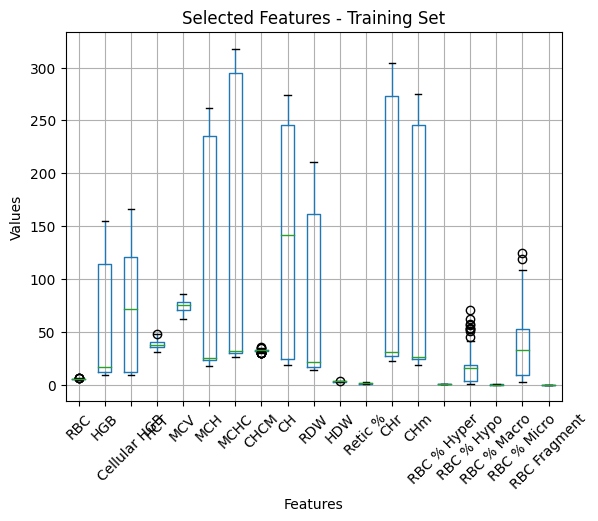

In [ ]:
custom_title = 'Selected Features - Training Set'
create_boxplot(df_train, selected_features, title=custom_title)

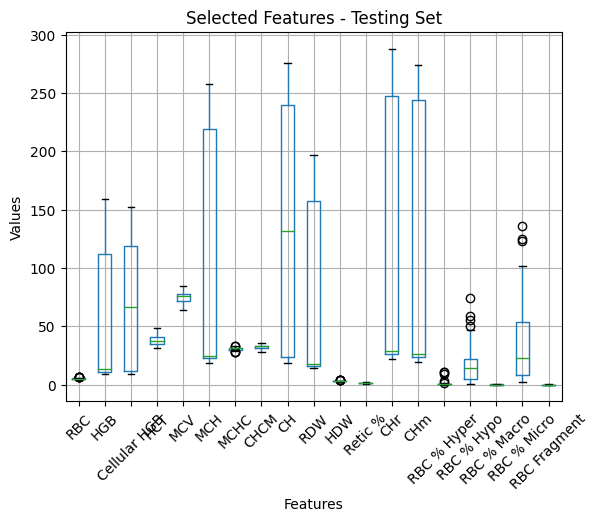

In [ ]:
custom_title = 'Selected Features - Testing Set'
create_boxplot(df_test, selected_features, title=custom_title)

In [ ]:
def handle_outliers_with_median(data, features, threshold=1.5):
    for feature in features:
        # Convert the column to numeric values
        data[feature] = pd.to_numeric(data[feature], errors='coerce')

        # Calculate the IQR for the current column
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)

        # Calculate the median of the feature
        median = np.median(data[feature])

        # Replace outliers with the median value
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound), median, data[feature])

    return data

In [ ]:
# changes the df_train and df_test to handle outliers
df_train = handle_outliers_with_median(df_train, selected_features, threshold=1.5)
df_test = handle_outliers_with_median(df_test, selected_features, threshold=1.5)

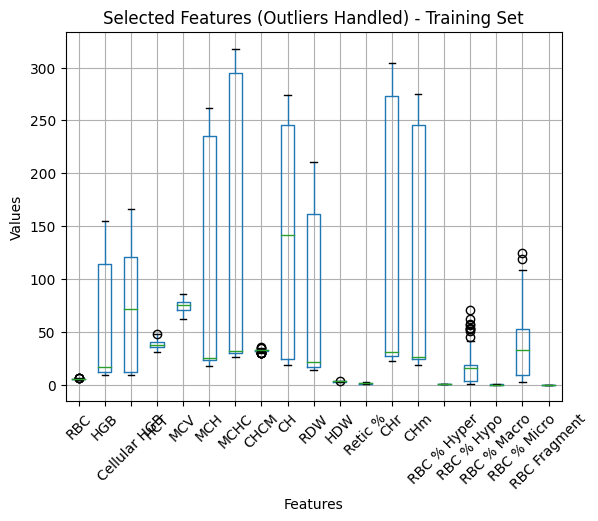

In [ ]:
custom_title = 'Selected Features (Outliers Handled) - Training Set'
create_boxplot(df_train, selected_features, title=custom_title)

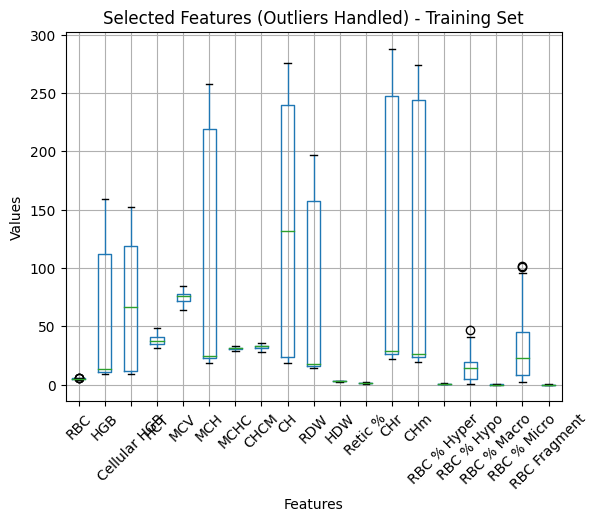

In [ ]:
custom_title = 'Selected Features (Outliers Handled) - Training Set'
create_boxplot(df_test, selected_features, title=custom_title)

#### 1.4 - Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardize_features(df, selected_features):
    # Convert the selected features to numeric type
    df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')

    # Create a new DataFrame with the selected numeric features
    numeric_df = df[selected_features]

    # Perform standardization on the numeric features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Create a DataFrame from the scaled data
    scaled_df = pd.DataFrame(scaled_data, columns=selected_features)

    # Replace the original numeric features with the scaled values
    df[selected_features] = scaled_df

    return df

In [ ]:
df_train_norm= standardize_features(df_train, selected_features)
df_train_norm.head()

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,0.000554,-1.023533,0.541608,-0.123685,0.667902,1.142537,1.489724,1.542218,1.123778,1.653892,0.151636,1.870232,1.157240,1.190317,0.525679,0.002321,-0.690501,2.706667,0.529175,1
1,1.670235,0.733439,-1.110191,-0.176031,-2.186036,0.527162,1.238240,-0.275806,0.566720,0.949542,2.377406,0.130105,0.713368,0.717182,0.525679,0.002321,-0.690501,0.101946,1.987635,1
2,1.649364,0.826895,-1.110191,-0.987396,0.159667,0.604084,1.536877,2.061653,-1.171686,-0.987421,0.151636,-0.026060,0.672268,0.671688,0.525679,0.507685,-0.690501,0.813210,-0.200054,1
3,0.313619,-0.986151,-1.117615,-0.149858,-0.641781,-0.946854,-0.693473,-1.401250,-1.155358,-0.975230,0.540263,0.219342,-0.972526,-0.929690,0.525679,-0.048855,1.005729,-0.658035,-0.200054,1
4,1.357170,-0.986151,-1.112047,-0.306897,-2.029655,-0.963200,-0.689544,-0.189234,-1.167844,-0.979294,1.564823,-0.583793,-0.984034,-0.941518,0.525679,-0.503043,-0.690501,0.036990,1.258405,1


In [ ]:
df_test_norm = standardize_features(df_test, selected_features)
df_test_norm.head()

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,0.333403,0.838202,0.742991,-1.591242,0.106186,0.825397,0.403048,0.879772,0.700076,1.268728,0.378193,-0.005205,1.045877,0.756043,0.547533,2.364333,-0.83666,0.685950,2.463323,1
1,0.495933,-0.837035,0.000000,-0.425192,-1.267792,-0.843903,-0.700408,0.388941,0.000000,-0.816437,0.410560,1.099330,-0.721917,-0.902904,-0.354286,-0.784978,-0.83666,-0.407246,0.394132,1
2,1.281493,1.107471,1.082042,-0.331908,-1.920995,0.965171,0.403048,0.757064,0.889133,1.227708,2.244691,2.265228,-0.737972,-0.904760,0.547533,2.013435,-0.83666,-0.261249,-0.295599,1
3,0.231822,1.203639,1.176223,-0.028735,0.106186,0.715575,0.403048,0.879772,0.610524,1.282401,0.378193,-0.373383,1.045877,0.700374,0.547533,1.662537,-0.83666,1.116818,2.463323,1
4,-0.425068,1.242106,1.063206,-0.168661,0.286379,1.354541,0.403048,0.327587,1.157791,1.282401,-0.819386,0.639107,1.509678,1.192120,0.547533,0.697567,0.83666,2.327524,-0.985329,1


### 2. Data Visualization

#### 2.1 - Bar Chart

In [ ]:
def create_bar_chart(data, features, common_title=None):
    num_rows = (len(features) + 4) // 5  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4*num_rows))

    for i, feature in enumerate(features):
        row = i // 5
        col = i % 5
        ax = axes[row, col]

        counts = data[feature].value_counts()
        ax.bar(counts.index, counts.values)
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')
        ax.set_title(f'{feature}')

    # Remove empty subplots
    if len(features) < num_rows * 5:
        for i in range(len(features), num_rows * 5):
            row = i // 5
            col = i % 5
            fig.delaxes(axes[row, col])
    if common_title:
      fig.suptitle(common_title, fontsize=16, y=1.0)

    # Adjust spacing between subplots
    fig.tight_layout()

    plt.show()

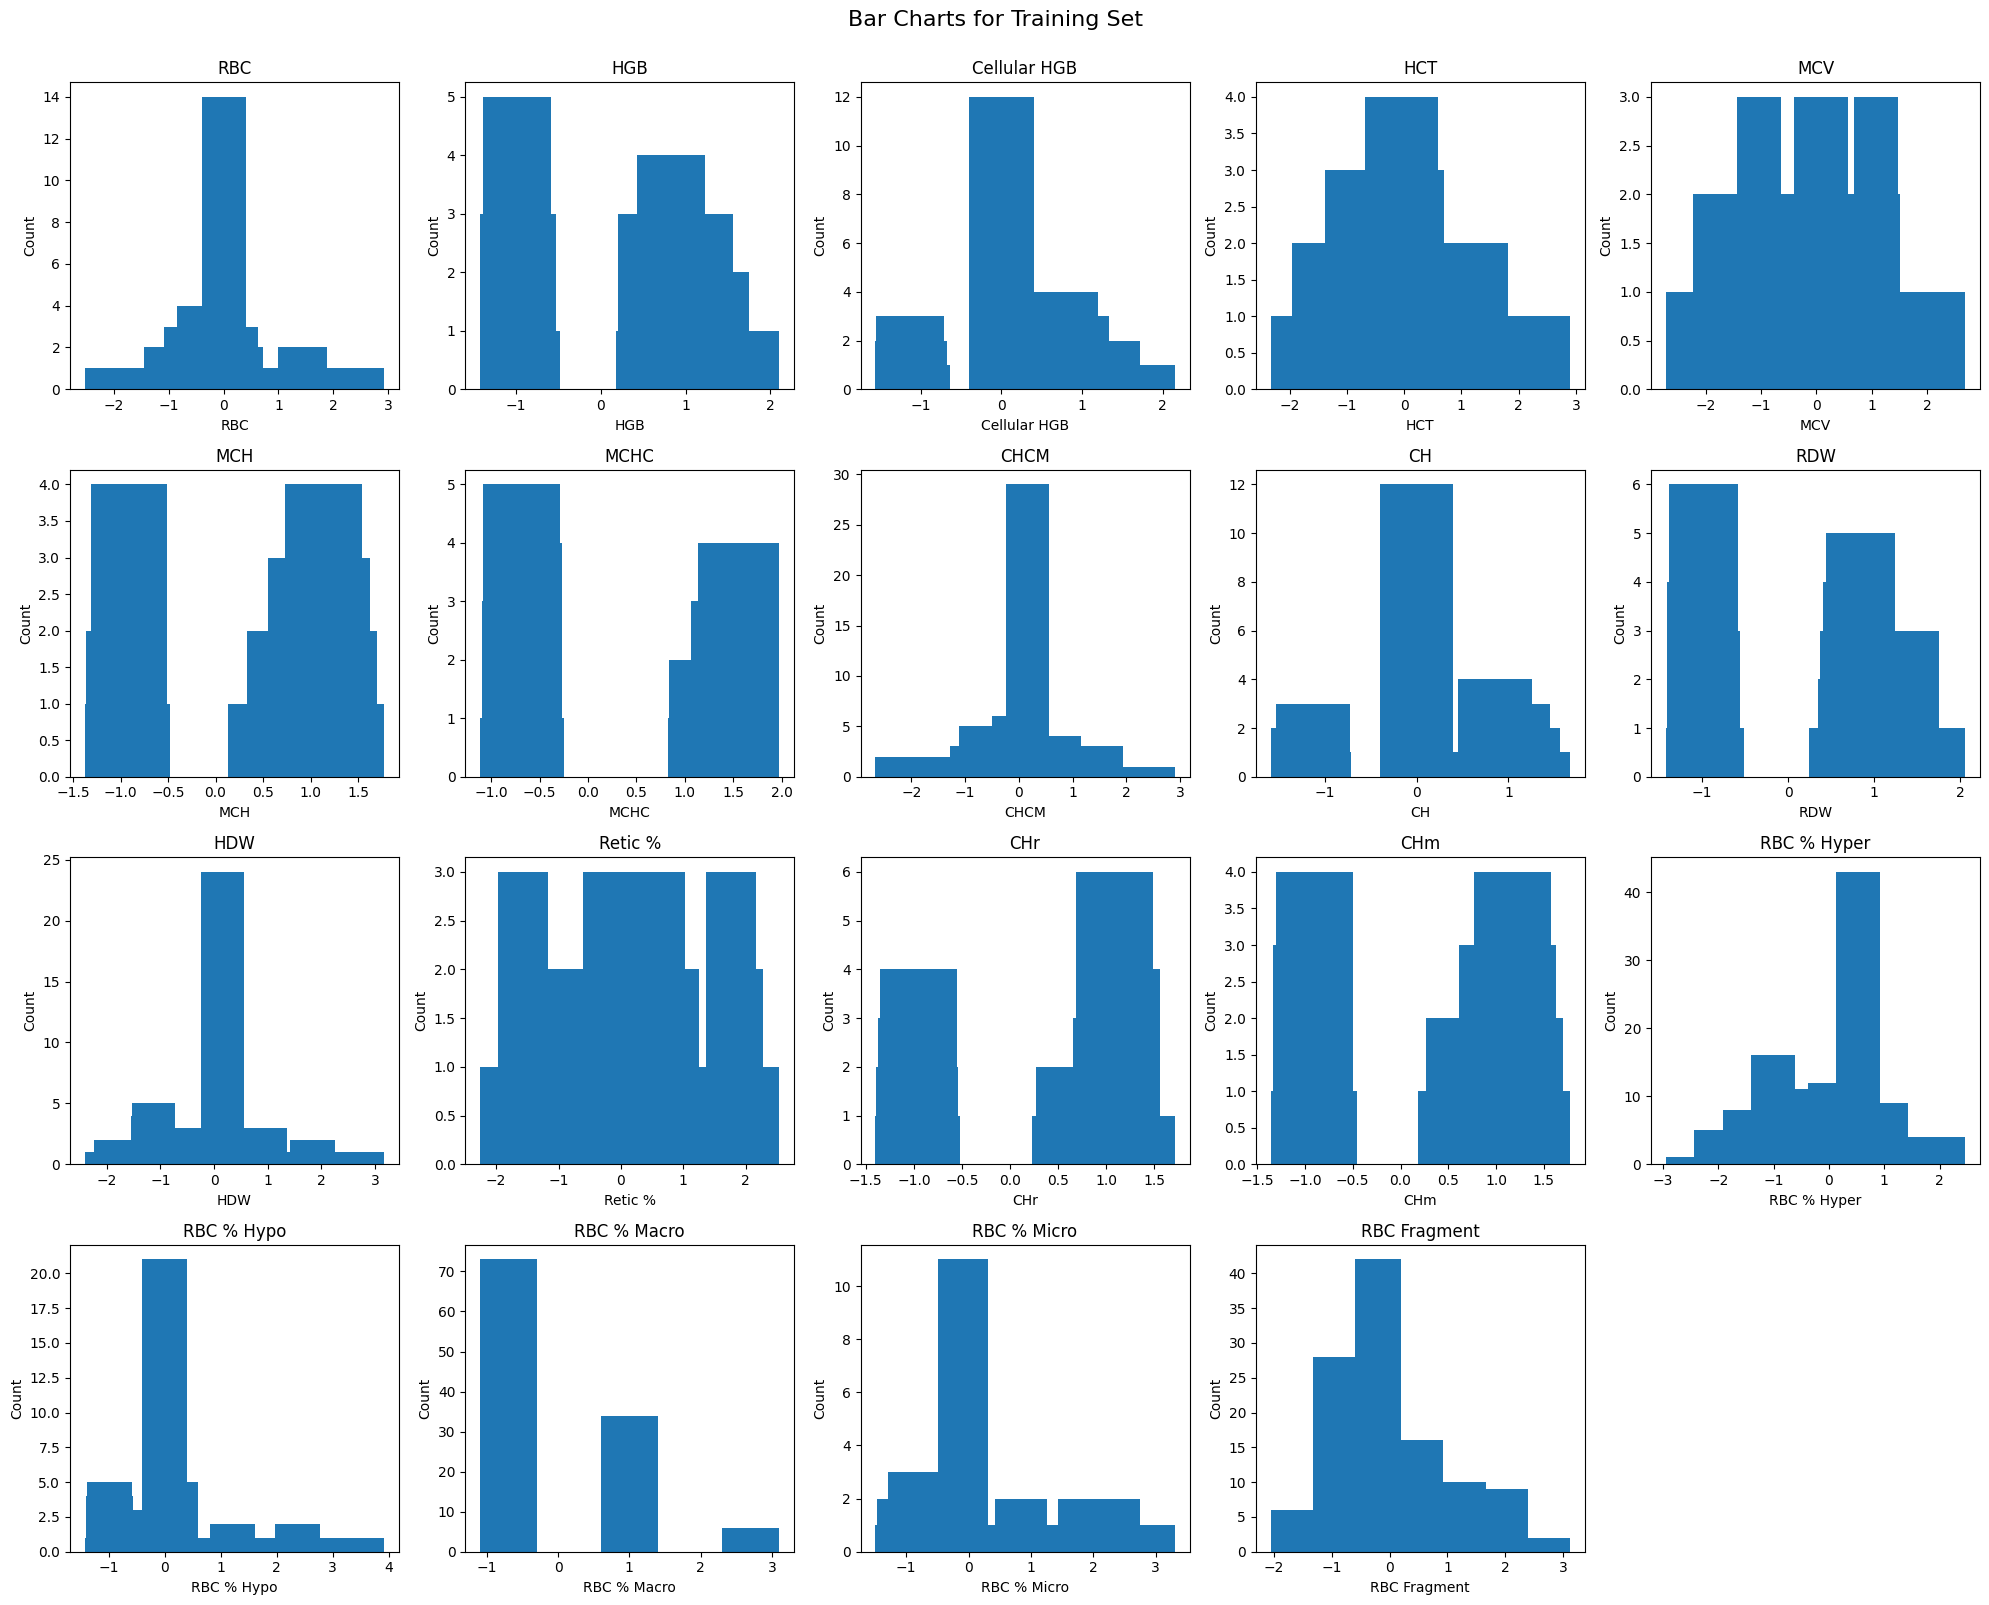

In [ ]:
common_title = 'Bar Charts for Training Set'
create_bar_chart(df_train_norm, selected_features, common_title)

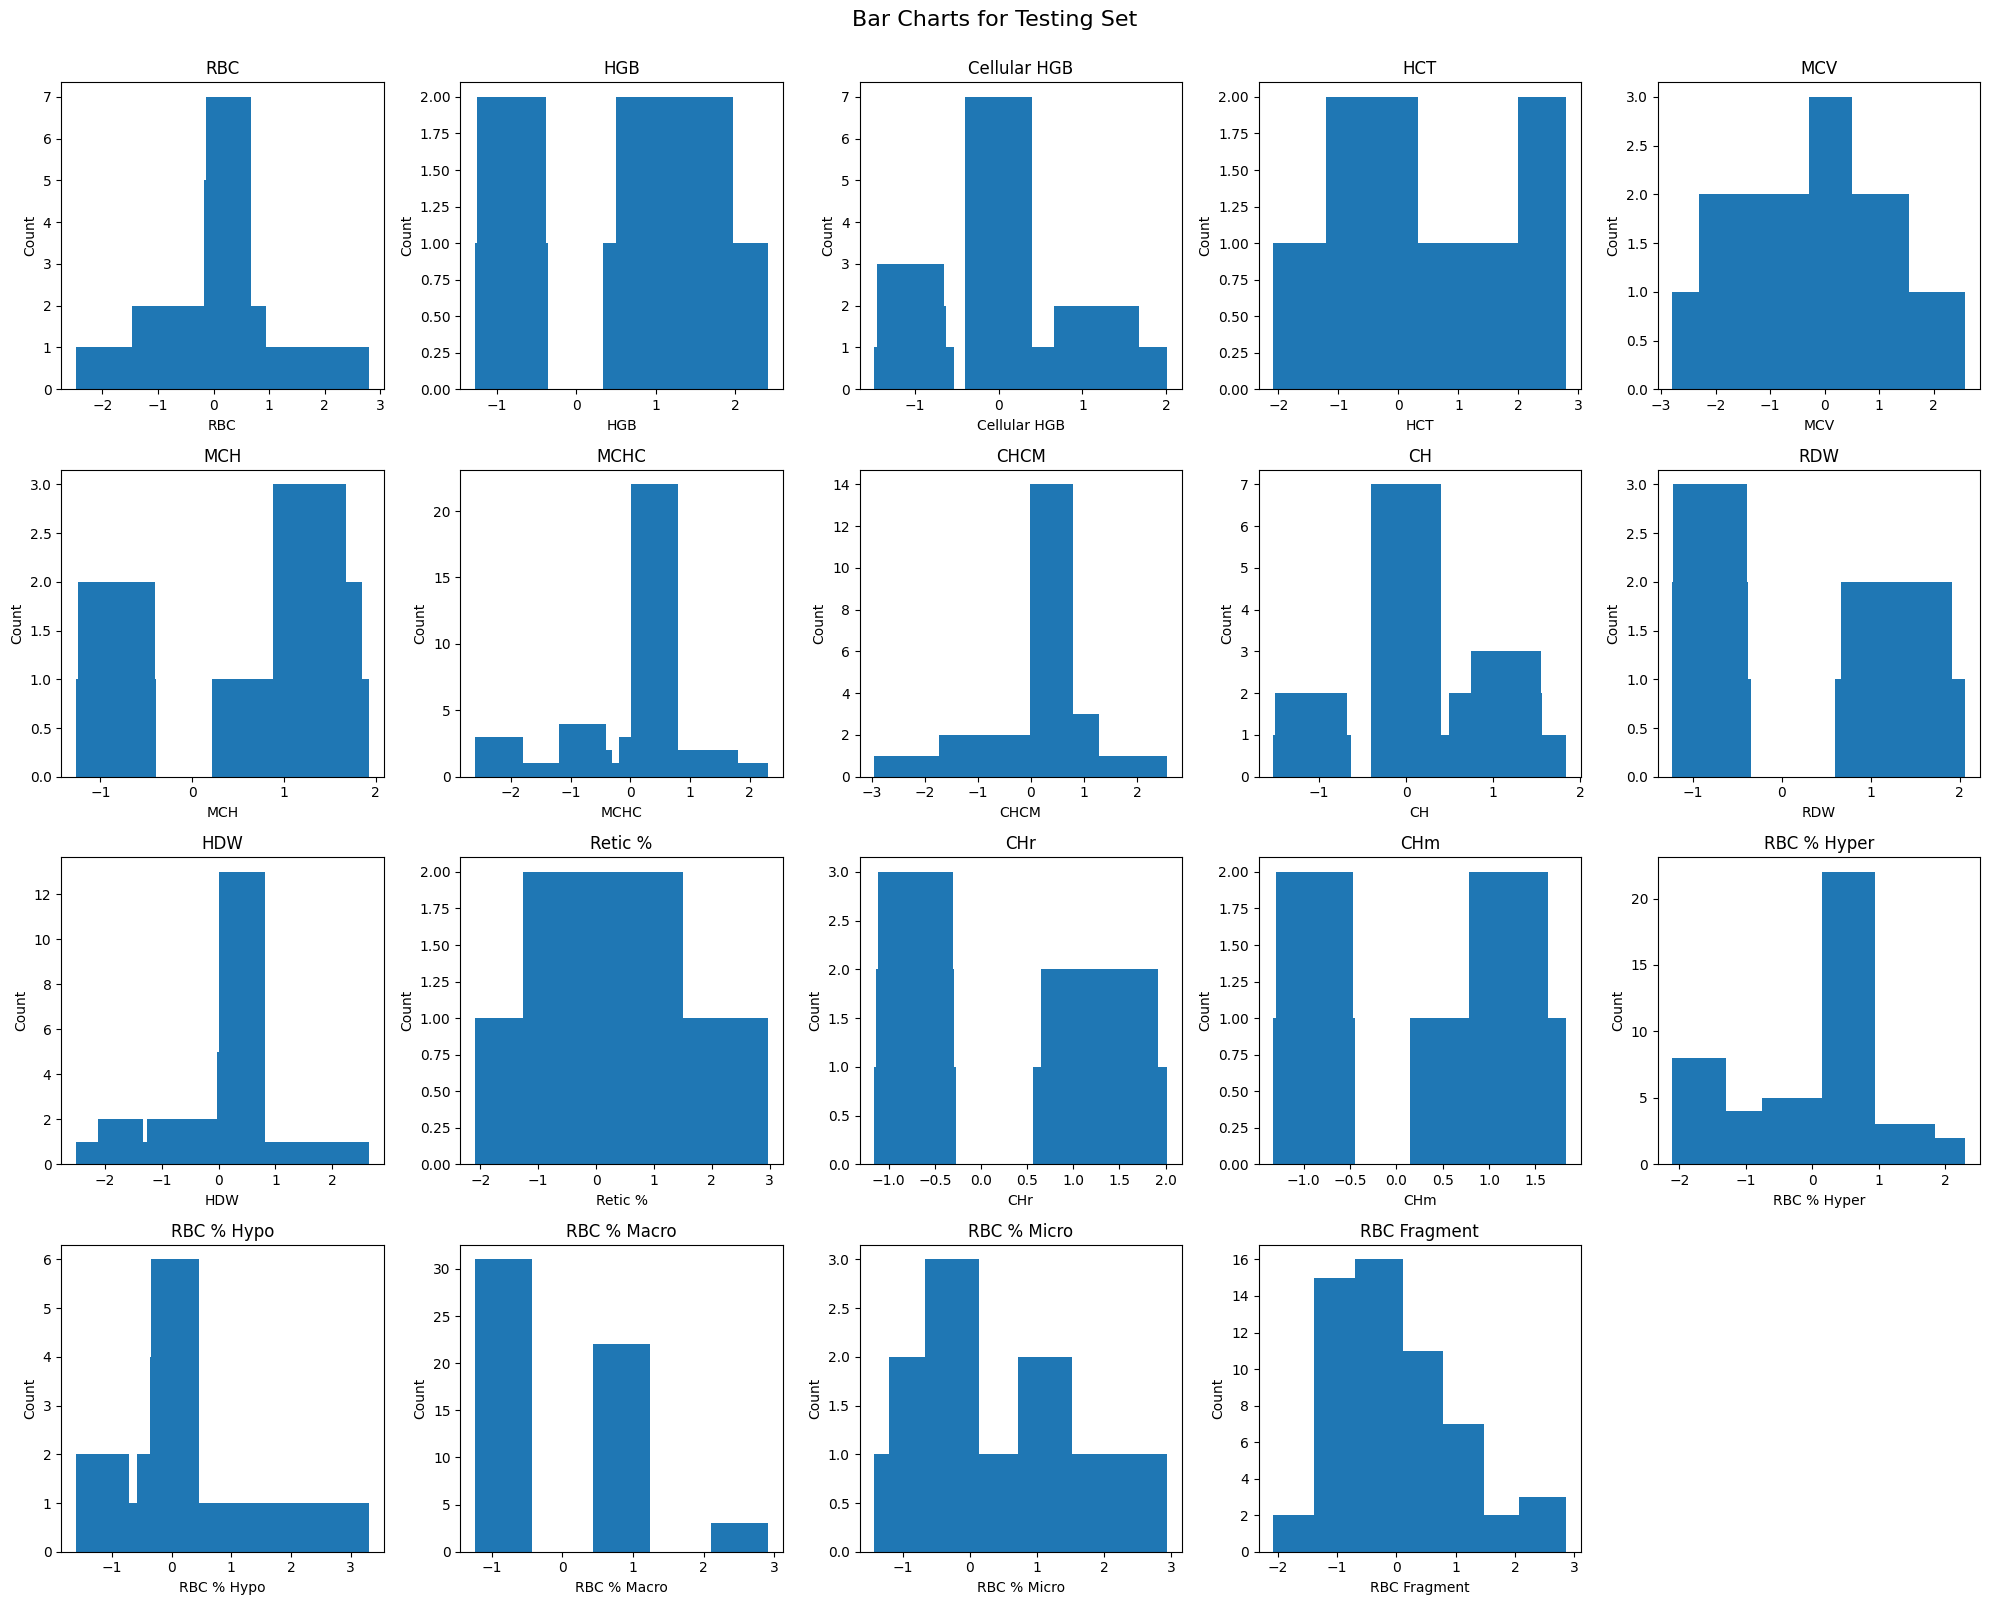

In [ ]:
common_title = 'Bar Charts for Testing Set'
create_bar_chart(df_test_norm, selected_features, common_title)

#### 2.2 - Heatmap

In [ ]:
def plot_correlation_heatmap(data,title):
    numeric_features = data.select_dtypes(include=np.number)
    corr_matrix = numeric_features.corr()
    plt.figure(figsize=(16,14))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title(title)
    plt.show()

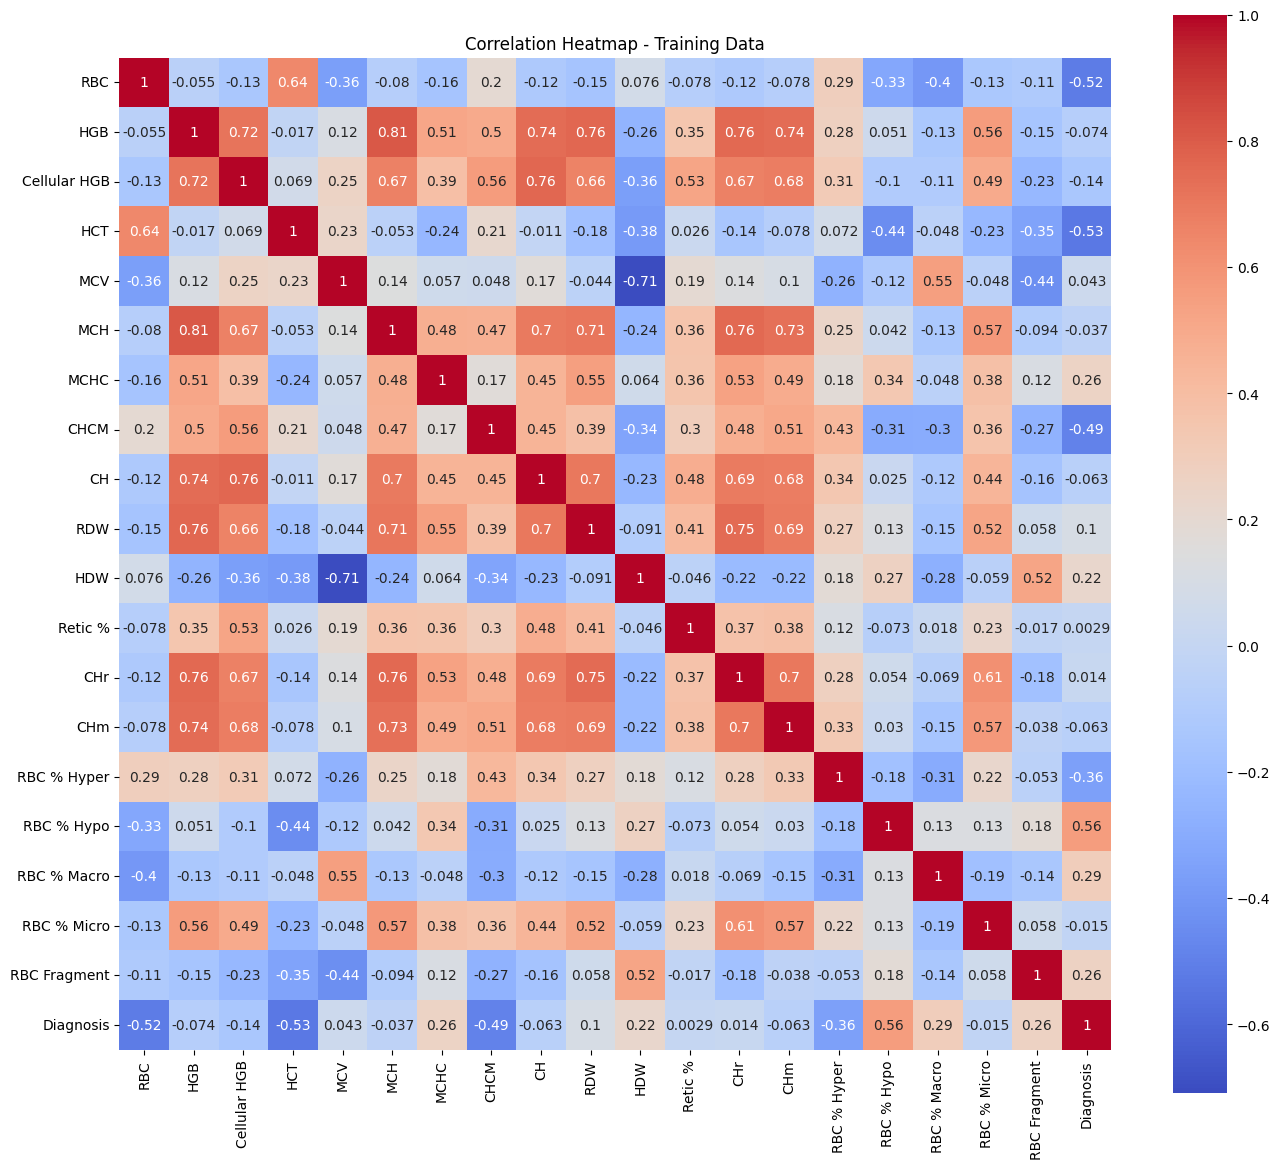

In [ ]:
plot_correlation_heatmap(df_train_norm, title='Correlation Heatmap - Training Data')

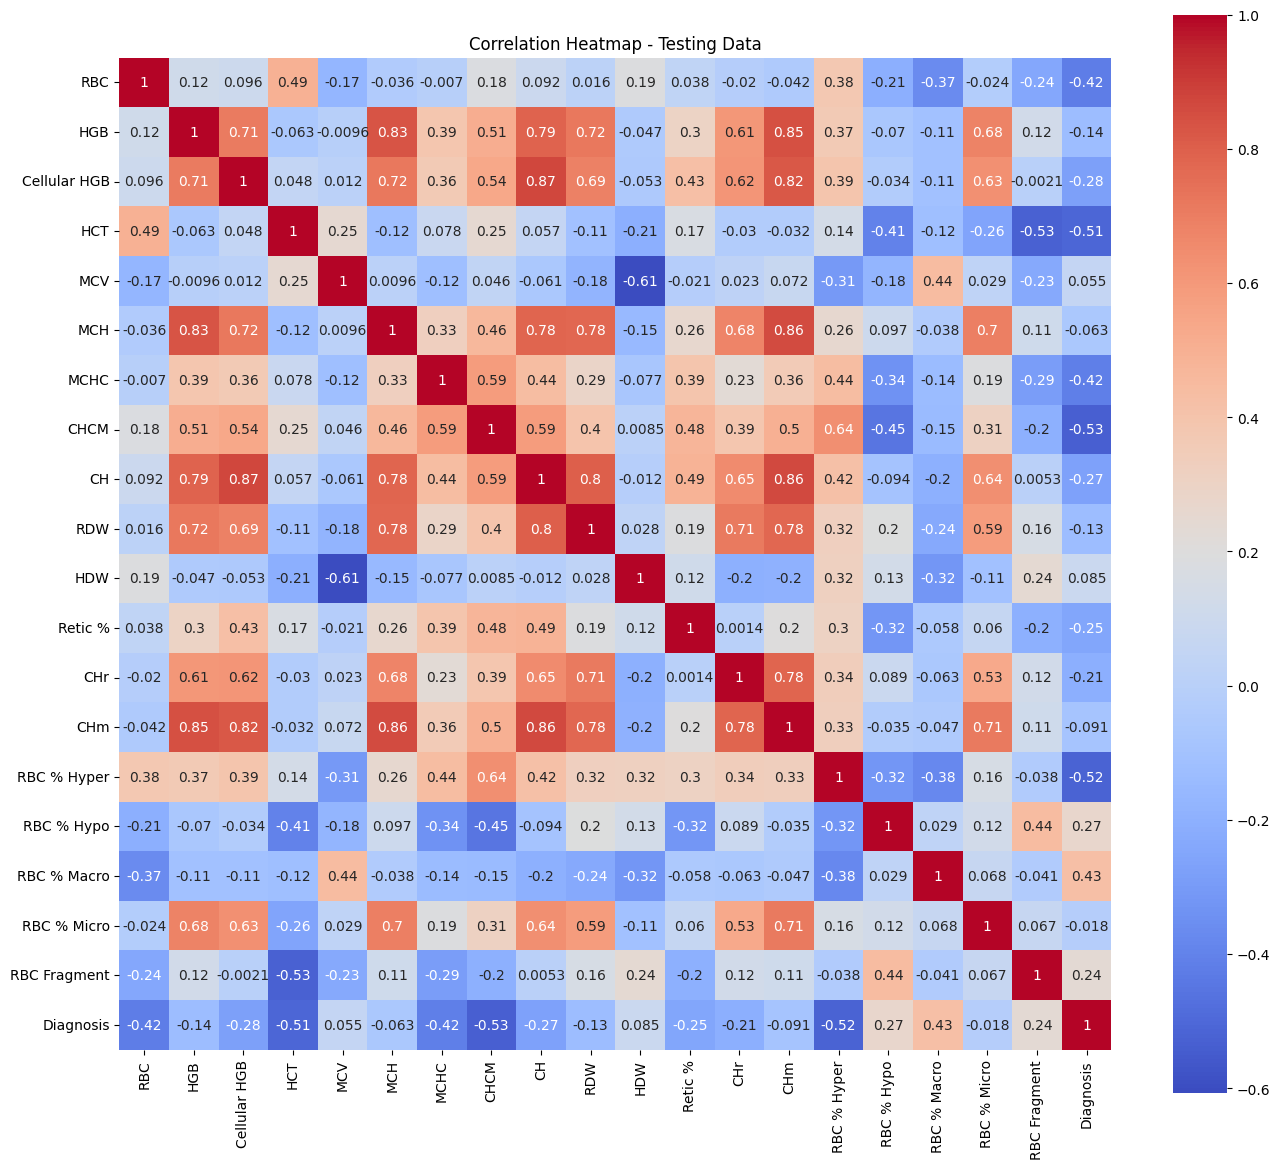

In [ ]:
plot_correlation_heatmap(df_test_norm, title='Correlation Heatmap - Testing Data')

### 3. Model Building

#### 3.1 - Models Before Hyperparameter Tuning

##### 3.1.1 - SVM

In [ ]:
X_train = df_train_norm.drop('Diagnosis', axis=1)
y_train = df_train_norm['Diagnosis']

X_test = df_test_norm.drop('Diagnosis', axis=1)
y_test = df_test_norm['Diagnosis']

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

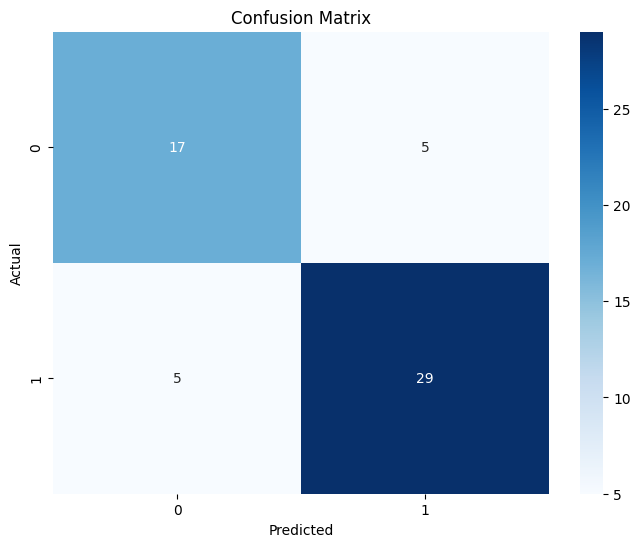


Accuracy: 0.8214285714285714
Precision: 0.7727272727272727
Sensitivity: 0.7727272727272727
F1-score: 0.7727272727272727


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F1-score:", f1)

##### 3.1.2 - Random Forest


In [ ]:
X_train = df_train_norm.drop('Diagnosis', axis=1)
y_train = df_train_norm['Diagnosis']

X_test = df_test_norm.drop('Diagnosis', axis=1)
y_test = df_test_norm['Diagnosis']

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

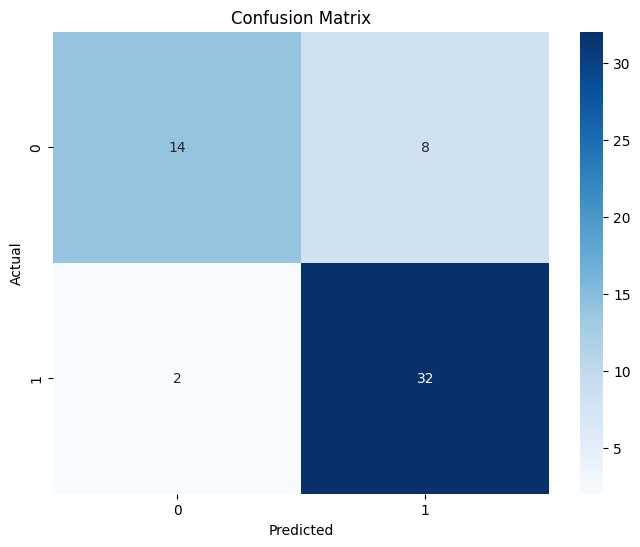


Accuracy: 0.8214285714285714
Precision: 0.875
Sensitivity: 0.6363636363636364
F1-score: 0.7368421052631579


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F1-score:", f1)

##### 3.1.3 - Decision Tree

In [ ]:
X_train = df_train_norm.drop('Diagnosis', axis=1)
y_train = df_train_norm['Diagnosis']

X_test = df_test_norm.drop('Diagnosis', axis=1)
y_test = df_test_norm['Diagnosis']

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

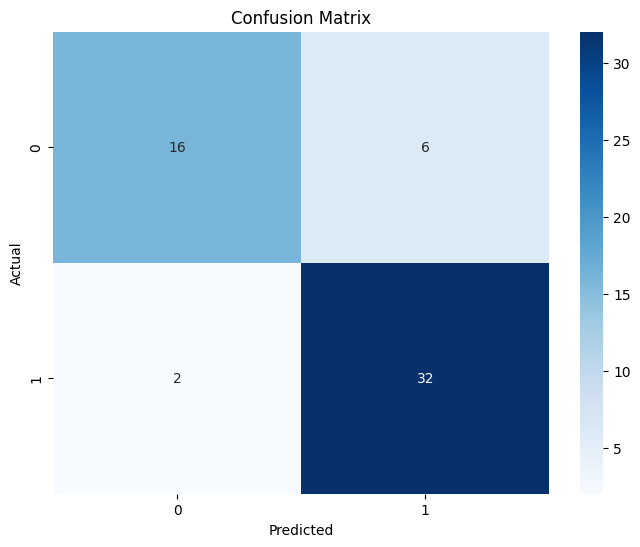


Accuracy: 0.8571428571428571
Precision: 0.8888888888888888
Sensitivity: 0.7272727272727273
F1-score: 0.7999999999999999


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F1-score:", f1)

#### 3.2 - Models After Hyperparameter Tuning

##### 3.2.1 - SVM

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

svm_model = SVC()

In [ ]:
grid_search = GridSearchCV(svm_model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

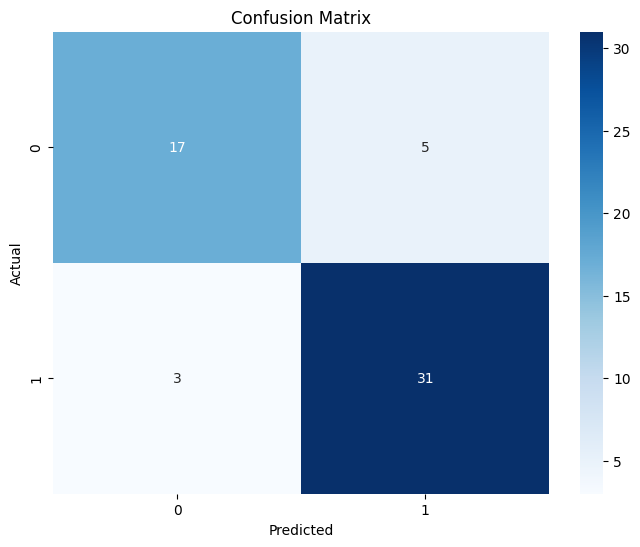


Accuracy: 0.8571428571428571
Precision: 0.85
Sensitivity: 0.7727272727272727
F1-score: 0.8095238095238095


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F1-score:", f1)

##### 3.2.2 - Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid ,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
best_params = grid_search.best_params_

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

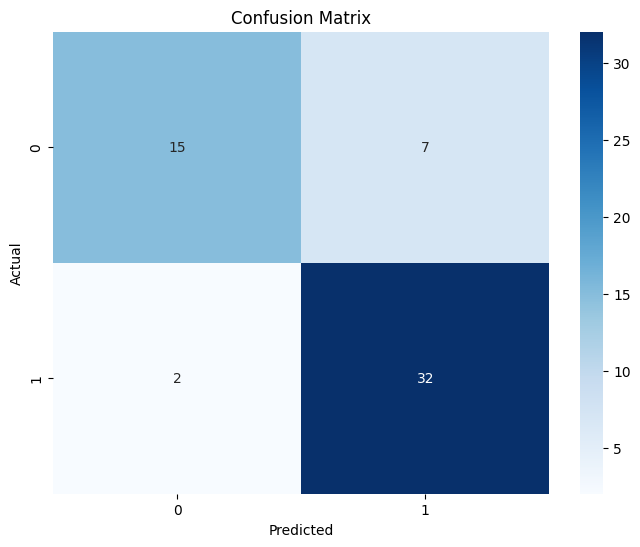


Accuracy: 0.8392857142857143
Precision: 0.8823529411764706
Sensitivity: 0.6818181818181818
F1-score: 0.7692307692307693


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F1-score:", f1)

##### 3.2.3 - Decision Tree

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
best_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=10, criterion='entropy')
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

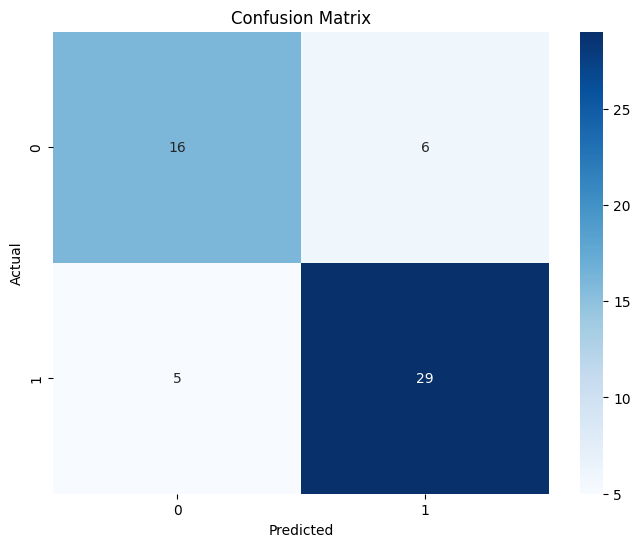


Accuracy: 0.8035714285714286
Precision: 0.7619047619047619
Sensitivity: 0.7272727272727273
F1-score: 0.7441860465116279


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F1-score:", f1)

### 4. Performance Evaluation